In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Load the dataset (update the file path if needed)
data = pd.read_csv('gaze_features_z_score.csv')


In [62]:
features_of_interest = ['Pupil Diameter Mean', 'Saccade Duration Min','Fixation Duration Min','Saccade Count','Fixation Count',  'Label']
selected_data = data[features_of_interest]

C:\Users\hughq\AppData\Local\Temp\ipykernel_23568\3364884994.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Binary Label'] = selected_data['Label'] > 4


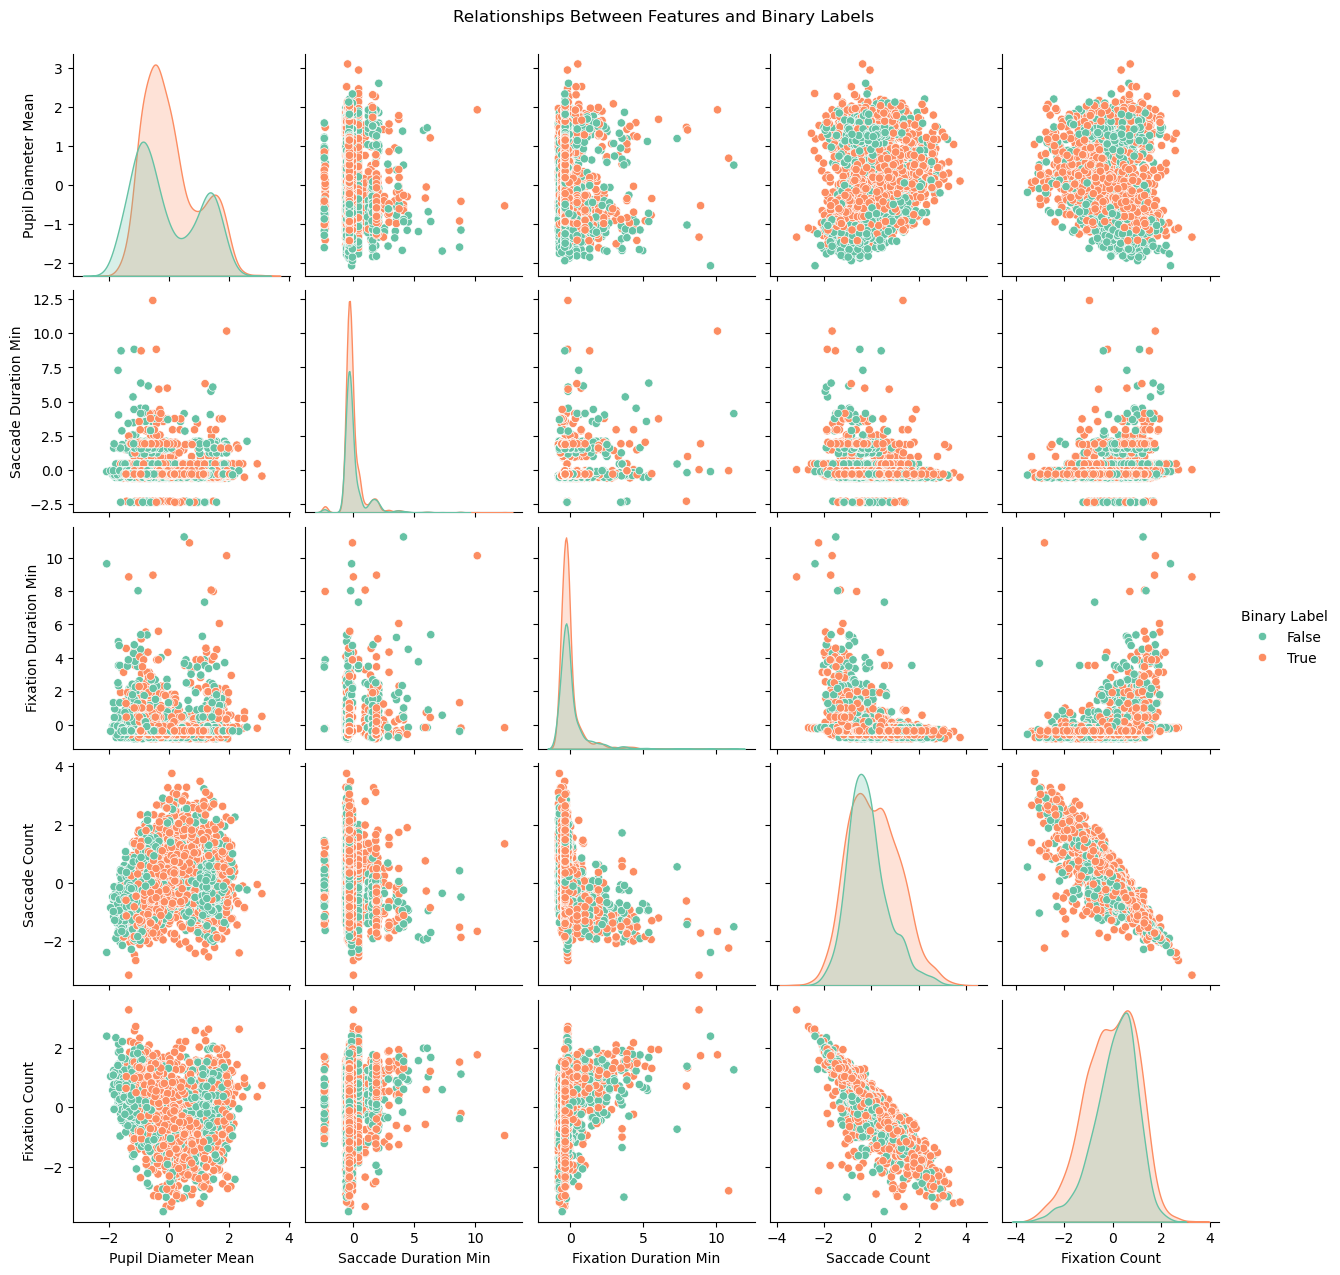

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a binary label for easier understanding
selected_data['Binary Label'] = selected_data['Label'] > 4
selected_data = selected_data[['Pupil Diameter Mean', 'Saccade Duration Min','Fixation Duration Min','Saccade Count','Fixation Count', 'Binary Label']]
# Pairplot to visualize relationships between features and binary labels
sns.pairplot(selected_data, hue='Binary Label', diag_kind='kde', palette='Set2')

# Customize plot
plt.suptitle("Relationships Between Features and Binary Labels", y=1.02)
plt.show()


C:\Users\hughq\AppData\Local\Temp\ipykernel_23568\2376501127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Ternary Label'] = selected_data['Label'].apply(
C:\Users\hughq\AppData\Local\Temp\ipykernel_23568\2376501127.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='best')


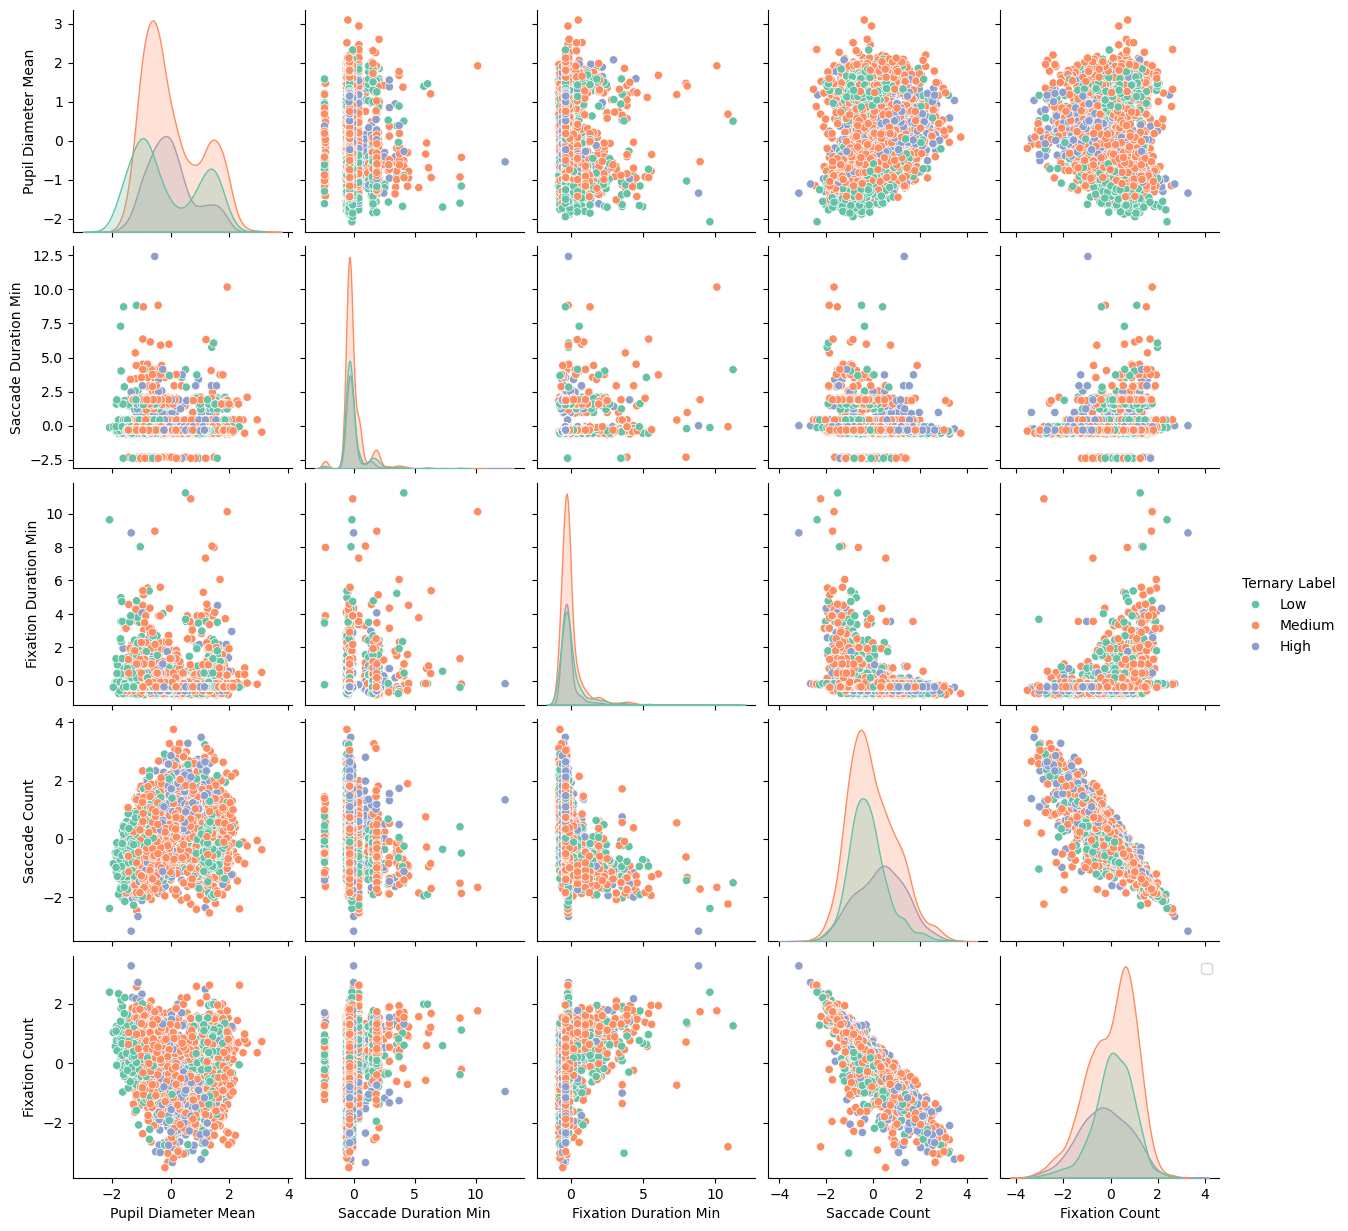

In [108]:
selected_data = data[features_of_interest]
selected_data['Ternary Label'] = selected_data['Label'].apply(
    lambda x: 'Low' if x <= 3 else ('Medium' if x <= 6 else 'High')
)
selected_data = selected_data[['Pupil Diameter Mean', 'Saccade Duration Min','Fixation Duration Min','Saccade Count', 'Fixation Count','Ternary Label']]
# Pairplot to visualize relationships between features and binary labels
sns.pairplot(selected_data, hue='Ternary Label', diag_kind='kde', palette='Set2')
plt.legend(loc='best')
plt.savefig('./images/ternary_label_pairplot.pdf',dpi = 300)
# Customize plot
# plt.suptitle("Relationships Between Features and Ternary Labels", y=1.0)
plt.show()


In [45]:
from scipy.stats import ttest_ind

selected_data = data[features_of_interest]
features = ['Pupil Diameter Mean', 'Saccade Duration Min','Fixation Duration Min','Saccade Count', 'Fixation Count']
# Separate the data into two groups
group_low = selected_data[selected_data['Label'] <= 3]
group_high = selected_data[selected_data['Label'] > 6]

# Perform t-tests
t_test_results = {}
for feature in features:
    t_stat, p_value = ttest_ind(group_low[feature], group_high[feature], equal_var=False)
    t_test_results[feature] = {'t_stat': t_stat, 'p_value': p_value}

# Convert to DataFrame for better display
t_test_df = pd.DataFrame(t_test_results).T
t_test_df['Significant'] = t_test_df['p_value'] < 0.05
t_test_df



,t_stat,p_value,Significant
Pupil Diameter Mean,-2.483328,1.313100e-02,True
Saccade Duration Min,1.273651,2.029924e-01,False
Fixation Duration Min,4.220341,2.594915e-05,True
Saccade Count,-10.647880,2.371427e-25,True
Fixation Count,7.030917,3.435130e-12,True


In [28]:
from scipy.stats import f_oneway

selected_data = data[features_of_interest]
selected_data['Three-Class Label'] = selected_data['Label'].apply(
    lambda x: 'Low' if x <= 3 else ('Medium' if x <= 6 else 'High')
)
# Separate data into three groups
group_low = selected_data[selected_data['Three-Class Label'] == 'Low']
group_medium = selected_data[selected_data['Three-Class Label'] == 'Medium']
group_high = selected_data[selected_data['Three-Class Label'] == 'High']

# Perform ANOVA
anova_results = {}
for feature in features:
    f_stat, p_value = f_oneway(group_low[feature], group_medium[feature], group_high[feature])
    anova_results[feature] = {'f_stat': f_stat, 'p_value': p_value}

anova_df = pd.DataFrame(anova_results).T
anova_df['Significant'] = anova_df['p_value'] < 0.05
anova_df


C:\Users\hughq\AppData\Local\Temp\ipykernel_23568\763476389.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data['Three-Class Label'] = selected_data['Label'].apply(


,f_stat,p_value,Significant
Pupil Diameter Mean,8.222025,2.747997e-04,True
Saccade Duration Min,1.625546,1.969784e-01,False
Fixation Duration Min,7.722718,4.515550e-04,True
Saccade Count,55.265266,2.704919e-24,True
Fixation Count,27.720316,1.179279e-12,True


In [3]:
data[data['Label']<= 4]

,Participant,Level,Label,Pupil Diameter Max,Pupil Diameter Min,Pupil Diameter Mean,Blink Count,Blink Duration Max,Blink Duration Mean,Fixation Count,...,Saccade Peak Velocity Mean,Saccade Peak Acceleration Max,Saccade Peak Acceleration Min,Saccade Peak Acceleration Mean,Saccade Peak Deceleration Max,Saccade Peak Deceleration Min,Saccade Peak Deceleration Mean,Saccade Direction Max,Saccade Direction Min,Saccade Direction Mean
0,1030,1,2,-0.697554,-0.091461,-0.774511,0.253835,-0.596481,0.103248,0.477612,...,-0.141453,-0.686884,-0.633205,-1.016300,-3.707950,0.809294,0.966102,0.602353,-0.559945,-0.092188
1,1030,1,2,-0.697554,-0.913755,-1.161758,-1.179584,-1.426223,-1.853914,1.110305,...,0.202020,-0.980126,0.348839,-0.264104,0.538855,0.937397,0.147858,0.048564,-0.633658,-0.125565
2,1030,1,3,-0.697554,-0.502608,-1.042130,0.424480,0.250022,0.369116,-0.281620,...,0.815624,1.724210,-1.430938,0.666455,-0.349930,-0.116505,-0.281926,0.587103,-0.633658,-0.526562
3,1030,1,2,-0.697554,-0.030551,-0.813938,-0.428746,-1.090974,-0.957562,1.144815,...,0.141990,-0.176291,0.095107,-0.138418,0.241145,0.253168,-0.230143,0.465377,1.492137,-0.435971
4,1030,1,2,-0.697554,-0.548291,-0.909494,0.253835,-0.420476,-0.155126,0.765199,...,0.150353,-0.481959,-0.029597,-0.198545,0.290585,0.705217,-0.221359,-1.434710,0.751692,0.409802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,1953,8,4,-1.018461,-0.442219,-0.932915,0.187264,-0.032615,-0.473893,-0.752605,...,-0.435039,-0.675964,-0.626682,-0.506624,0.530395,0.010574,0.438070,0.579068,-0.492724,-1.007673
2961,1953,8,4,-1.004039,0.185817,-0.502047,1.357276,2.119598,1.613075,-1.094722,...,-0.947216,-0.562350,-0.116299,-1.151664,0.521155,0.349147,0.880498,0.443276,-0.668444,-0.058811
2966,1953,8,3,-0.340674,0.727227,0.047735,-0.481314,-0.247837,0.101822,-1.051958,...,0.277775,-0.324095,-0.441490,0.672033,0.291950,0.210637,-0.373921,0.625589,-0.303602,1.155932
2967,1953,8,3,-0.859830,-0.139029,-0.781570,-0.397742,-0.247837,-0.329965,0.173962,...,-0.266095,-0.589877,-0.030440,-0.234271,0.329559,0.172685,0.442091,0.635523,-0.493355,-0.127925


In [32]:
# Reload necessary libraries and files due to environment reset
import pandas as pd

# Reload the feature importance files for binary and ternary classifications
binary_importance_path = './results/feature_importance_binary.csv'
ternary_importance_path = './results/feature_importance_ternary.csv'

binary_importance = pd.read_csv(binary_importance_path)
ternary_importance = pd.read_csv(ternary_importance_path)

# Display the first few rows to understand the structure of the data
binary_importance.head(), ternary_importance.head()


(                Unnamed: 0  importance    stddev   p_value  n  p99_high  \
 0      Pupil Diameter Mean    0.076254  0.012151  0.000075  5  0.101273   
 1     Saccade Duration Min    0.061538  0.008395  0.000041  5  0.078823   
 2            Saccade Count    0.035452  0.009036  0.000465  5  0.054057   
 3    Fixation Duration Min    0.034783  0.020426  0.009489  5  0.076840   
 4  Fixation Dispersion Min    0.010033  0.007844  0.022956  5  0.026183   
 
     p99_low  
 0  0.051235  
 1  0.044254  
 2  0.016846  
 3 -0.007275  
 4 -0.006116  ,
                  Unnamed: 0  importance    stddev   p_value  n  p99_high  \
 0       Pupil Diameter Mean    0.084281  0.014844  0.000111  5  0.114846   
 1      Saccade Duration Min    0.071572  0.021232  0.000830  5  0.115288   
 2     Fixation Duration Min    0.060201  0.033695  0.008098  5  0.129579   
 3  Fixation Dispersion Mean    0.013378  0.005288  0.002406  5  0.024266   
 4            Fixation Count    0.011371  0.006520  0.008770  5  0

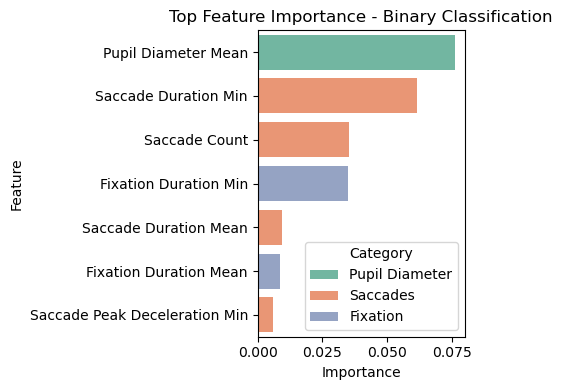

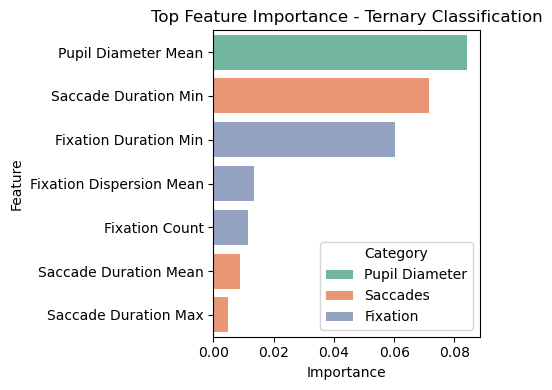

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define smart categorization rules
def categorize_feature(feature_name):
    if 'Pupil' in feature_name:
        return 'Pupil Diameter'
    elif 'Fixation' in feature_name:
        return 'Fixation'
    elif 'Saccade' in feature_name:
        return 'Saccades'
    elif 'Blink' in feature_name:
        return 'Blink Dynamics'
    else:
        return 'Other'

# Apply categorization to both datasets
binary_importance['Category'] = binary_importance['Unnamed: 0'].apply(categorize_feature)
ternary_importance['Category'] = ternary_importance['Unnamed: 0'].apply(categorize_feature)

# Filter top features by importance and p-value
threshold = 0.02
top_binary = binary_importance[binary_importance['p_value'] < threshold].sort_values(by='importance', ascending=False)
top_ternary = ternary_importance[ternary_importance['p_value'] < threshold].sort_values(by='importance', ascending=False)

# Plot bar charts for binary and ternary feature importance
def plot_feature_importance(data, title):
    plt.figure(figsize=(5, 4))
    sns.barplot(
        data=data, y='Unnamed: 0', x='importance', hue='Category', palette='Set2')
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.legend(title='Category', loc='lower right')
    plt.tight_layout()
    plt.show()

# Plot binary and ternary results
plot_feature_importance(top_binary, "Top Feature Importance - Binary Classification")
plot_feature_importance(top_ternary, "Top Feature Importance - Ternary Classification")


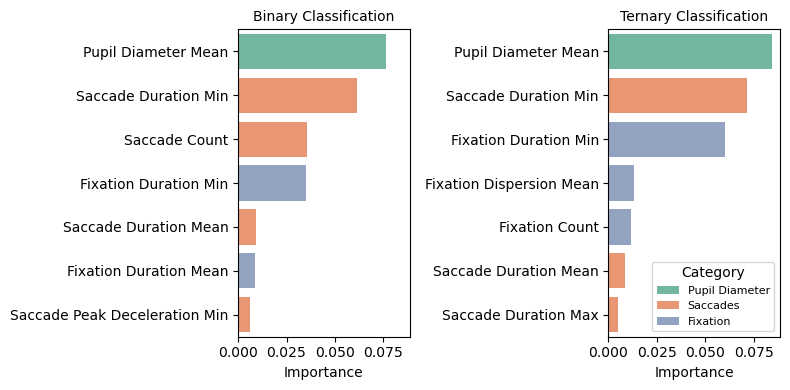

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define smart categorization rules
def categorize_feature(feature_name):
    if 'Pupil' in feature_name:
        return 'Pupil Diameter'
    elif 'Fixation' in feature_name:
        return 'Fixation'
    elif 'Saccade' in feature_name:
        return 'Saccades'
    elif 'Blink' in feature_name:
        return 'Blink Dynamics'
    else:
        return 'Other'

# Apply categorization to both datasets
binary_importance['Category'] = binary_importance['Unnamed: 0'].apply(categorize_feature)
ternary_importance['Category'] = ternary_importance['Unnamed: 0'].apply(categorize_feature)

# Filter top features by importance and p-value
threshold = 0.02
top_binary = binary_importance[binary_importance['p_value'] < threshold].sort_values(by='importance', ascending=False)
top_ternary = ternary_importance[ternary_importance['p_value'] < threshold].sort_values(by='importance', ascending=False)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharex=True)

# Plot binary feature importance
sns.barplot(
    ax=axes[0], data=top_binary, y='Unnamed: 0', x='importance', hue='Category', palette='Set2',legend=False
)
axes[0].set_title("Binary Classification", fontsize=10)
axes[0].set_xlabel('Importance')
axes[0].set_ylabel('')


# Plot ternary feature importance
sns.barplot(
    ax=axes[1], data=top_ternary, y='Unnamed: 0', x='importance', hue='Category', palette='Set2'
)
axes[1].set_title("Ternary Classification", fontsize=10)
axes[1].set_xlabel('Importance')
axes[1].set_ylabel('')

# Add legend only to the right plot
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles, labels, title='Category', loc='lower right',fontsize=8)

plt.tight_layout()
plt.savefig('./images/feature_importance.pdf', dpi=300)
plt.show()


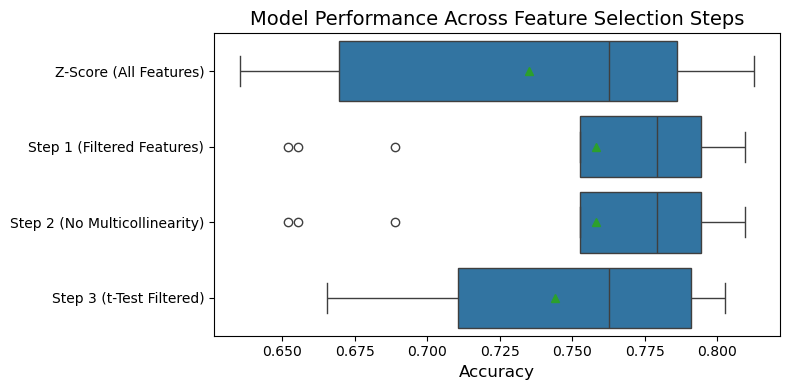

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
z_score_data = pd.read_csv('./results/binary_leaderboard_z_score.csv')
step1_data = pd.read_csv('./results/feature_step1_binary.csv')
step2_data = pd.read_csv('./results/feature_step2_binary.csv')
step3_data = pd.read_csv('./results/feature_step3_binary.csv')

# Extract the `score_test` column along with the model names
datasets = {
    "Z-Score (All Features)": z_score_data,
    "Step 1 (Filtered Features)": step1_data,
    "Step 2 (No Multicollinearity)": step2_data,
    "Step 3 (t-Test Filtered)": step3_data,
}

# Combine the datasets for boxplot
combined_data = pd.DataFrame()
for name, data in datasets.items():
    temp = data[['model', 'score_test']].copy()
    temp['Dataset'] = name
    combined_data = pd.concat([combined_data, temp])

# Create a boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(data=combined_data, y="Dataset", x="score_test", orient='h', showmeans=True)

# Annotate the best model in each dataset (adjusting for horizontal orientation)
best_models = combined_data.loc[combined_data.groupby('Dataset')['score_test'].idxmax()]


plt.title('Model Performance Across Feature Selection Steps', fontsize=14)
plt.ylabel('')
plt.xlabel('Accuracy', fontsize=12)
plt.tight_layout()
plt.show()


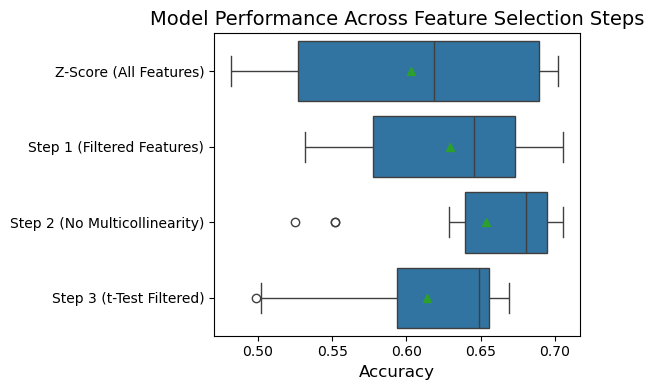

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
z_score_data = pd.read_csv('./results/ternary_leaderboard_z_score.csv')
step1_data = pd.read_csv('./results/feature_step1_ternary.csv')
step2_data = pd.read_csv('./results/feature_step2_ternary.csv')
step3_data = pd.read_csv('./results/feature_step3_ternary.csv')

# Extract the `score_test` column along with the model names
datasets = {
    "Z-Score (All Features)": z_score_data,
    "Step 1 (Filtered Features)": step1_data,
    "Step 2 (No Multicollinearity)": step2_data,
    "Step 3 (t-Test Filtered)": step3_data,
}

# Combine the datasets for boxplot
combined_data = pd.DataFrame()
for name, data in datasets.items():
    temp = data[['model', 'score_test']].copy()
    temp['Dataset'] = name
    combined_data = pd.concat([combined_data, temp])

# Create a boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=combined_data, y="Dataset", x="score_test", orient='h', showmeans=True)

# Annotate the best model in each dataset (adjusting for horizontal orientation)
best_models = combined_data.loc[combined_data.groupby('Dataset')['score_test'].idxmax()]


plt.title('Model Performance Across Feature Selection Steps', fontsize=14)
plt.ylabel('')
plt.xlabel('Accuracy', fontsize=12)
plt.tight_layout()
plt.show()


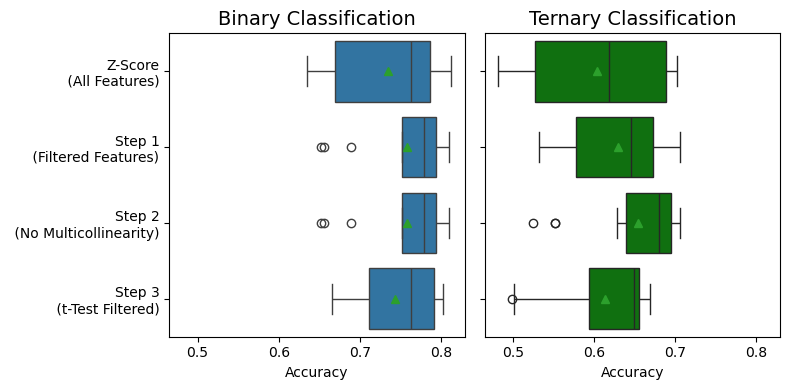

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets for binary and ternary performance
binary_datasets = {
    "Z-Score\n (All Features)": pd.read_csv('./results/binary_leaderboard_z_score.csv'),
    "Step 1\n (Filtered Features)": pd.read_csv('./results/feature_step1_binary.csv'),
    "Step 2\n (No Multicollinearity)": pd.read_csv('./results/feature_step2_binary.csv'),
    "Step 3\n (t-Test Filtered)": pd.read_csv('./results/feature_step3_binary.csv'),
}

ternary_datasets = {
    "Z-Score\n (All Features)": pd.read_csv('./results/ternary_leaderboard_z_score.csv'),
    "Step 1\n (Filtered Features)": pd.read_csv('./results/feature_step1_ternary.csv'),
    "Step 2\n (No Multicollinearity)": pd.read_csv('./results/feature_step2_ternary.csv'),
    "Step 3\n (t-Test Filtered)": pd.read_csv('./results/feature_step3_ternary.csv'),
}

# Function to combine datasets
def combine_datasets(datasets, label):
    combined_data = pd.DataFrame()
    for name, data in datasets.items():
        temp = data[['model', 'score_test']].copy()
        temp['Dataset'] = name
        temp['Type'] = label  # Add label to distinguish binary/ternary
        combined_data = pd.concat([combined_data, temp])
    return combined_data

# Combine data
binary_data = combine_datasets(binary_datasets, 'Binary')
ternary_data = combine_datasets(ternary_datasets, 'Ternary')
all_data = pd.concat([binary_data, ternary_data])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)

# Binary boxplot
sns.boxplot(ax=axes[0], data=binary_data, y="Dataset", x="score_test", orient='h', showmeans=True)
axes[0].set_title('Binary Classification', fontsize=14)
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('')

# Ternary boxplot
sns.boxplot(ax=axes[1], data=ternary_data, y="Dataset", x="score_test", orient='h', showmeans=True,color='g')
axes[1].set_title('Ternary Classification', fontsize=14)
axes[1].set_xlabel('Accuracy')
axes[1].set_ylabel('')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('./images/feature_selection_performance.pdf',dpi = 300)
plt.show()


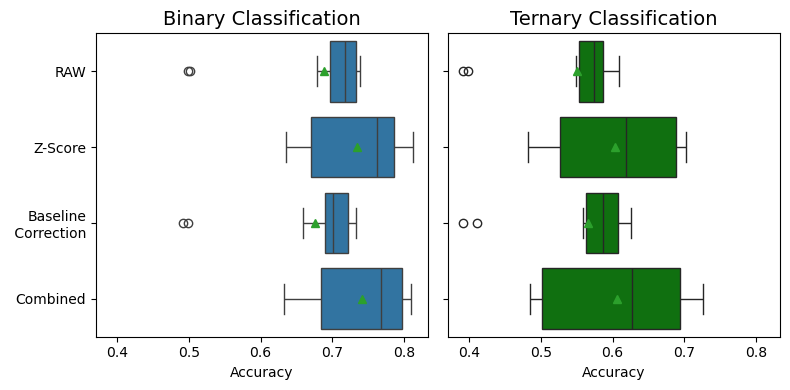

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets for binary and ternary performance
binary_datasets = {
    "RAW": pd.read_csv('./results/binary_leaderboard_raw.csv'),
    "Z-Score": pd.read_csv('./results/binary_leaderboard_z_score.csv'),
    'Baseline\n Correction': pd.read_csv('./results/binary_leaderboard_normalized_wo_z_score.csv'),
    'Combined': pd.read_csv('./results/binary_leaderboard_normalized.csv')

}

ternary_datasets = {
    "RAW": pd.read_csv('./results/ternary_leaderboard_raw.csv'),
    "Z-Score": pd.read_csv('./results/ternary_leaderboard_z_score.csv'),
    'Baseline\n Correction': pd.read_csv('./results/ternary_leaderboard_normalized_wo_z_score.csv'),
    'Combined': pd.read_csv('./results/ternary_leaderboard_normalized.csv')
}

# Function to combine datasets
def combine_datasets(datasets, label):
    combined_data = pd.DataFrame()
    for name, data in datasets.items():
        temp = data[['model', 'score_test']].copy()
        temp['Dataset'] = name
        temp['Type'] = label  # Add label to distinguish binary/ternary
        combined_data = pd.concat([combined_data, temp])
    return combined_data

# Combine data
binary_data = combine_datasets(binary_datasets, 'Binary')
ternary_data = combine_datasets(ternary_datasets, 'Ternary')
all_data = pd.concat([binary_data, ternary_data])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True,sharex=True)

# Binary boxplot
sns.boxplot(ax=axes[0], data=binary_data, y="Dataset", x="score_test", orient='h', showmeans=True)
axes[0].set_title('Binary Classification', fontsize=14)
axes[0].set_xlabel('Accuracy')
axes[0].set_ylabel('')

# Ternary boxplot
sns.boxplot(ax=axes[1], data=ternary_data, y="Dataset", x="score_test", orient='h', showmeans=True,color='g')
axes[1].set_title('Ternary Classification', fontsize=14)
axes[1].set_xlabel('Accuracy')
axes[1].set_ylabel('')
# Adjust layout and show plot
plt.tight_layout()
plt.savefig('./images/performance_comparison.pdf', dpi=300)
plt.show()



In [5]:
# Calculate correlations
features_to_correlate = ['Fixation Duration Mean', 'Saccade Duration Mean', 'Fixation Dispersion Mean']
correlation_results = {}

for feature in features_to_correlate:
    pearson_corr, _ = pearsonr(data['Pupil Diameter Mean'], data[feature])
    spearman_corr, _ = spearmanr(data['Pupil Diameter Mean'], data[feature])
    correlation_results[feature] = {'Pearson': pearson_corr, 'Spearman': spearman_corr}

# Display correlation results
correlation_df = pd.DataFrame(correlation_results).T
print("Correlation of Pupil Diameter Mean with other features:\n", correlation_df)


Correlation of Pupil Diameter Mean with other features:
                            Pearson  Spearman
Fixation Duration Mean   -0.247074 -0.348861
Saccade Duration Mean     0.204996  0.213796
Fixation Dispersion Mean -0.228595 -0.235155


In [6]:
from scipy.stats import ttest_ind

# Example: Split data based on a hypothetical cognitive load threshold
high_load = data[data['Pupil Diameter Mean'] > data['Pupil Diameter Mean'].median()]
low_load = data[data['Pupil Diameter Mean'] <= data['Pupil Diameter Mean'].median()]

# Perform t-test
ttest_results = ttest_ind(high_load['Pupil Diameter Mean'], low_load['Pupil Diameter Mean'])
print("T-test results between high and low cognitive load groups:", ttest_results)


T-test results between high and low cognitive load groups: TtestResult(statistic=72.95194559386319, pvalue=0.0, df=2987.0)
